### Import Libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the data

In [56]:
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Toyota_Cars_Detail.csv")

### Clean up the data

In [57]:
def clean_kilometer(value):
    return int(''.join(filter(str.isdigit, str(value))))

In [58]:
def clean_price(value):
    return float(''.join(filter(lambda x: x.isdigit() or x == '.', str(value))))


In [59]:
def clean_emi(value):
    digits = ''.join(filter(str.isdigit, str(value)))
    return int(digits) if digits else None

In [60]:
df['KilometerDriven'] = df['KilometerDriven'].apply(clean_kilometer)

In [61]:
df['Price'] = df['Price'].apply(clean_price)

In [62]:
df['EMIs'] = df['EMIs'].apply(clean_emi)

In [63]:
df['Year'] = df['Name'].str.extract('(\\d{4})').astype(int)

# 1. Model Analysis

In [64]:
print("\nCar model distribution:")
model_counts = df['Name'].str.split().str[1].value_counts()
print(model_counts)


Car model distribution:
Name
Toyota    19
Name: count, dtype: int64


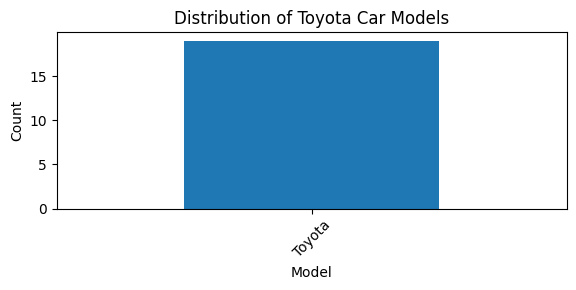

In [65]:
plt.figure(figsize=(6, 3))
model_counts.plot(kind='bar')
plt.title('Distribution of Toyota Car Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Price Analysis

In [66]:
print("\nPrice Statistics:")
print(df['Price'].describe())


Price Statistics:
count    19.000000
mean      6.781053
std       3.157574
min       2.330000
25%       2.955000
50%       7.280000
75%       9.790000
max      10.330000
Name: Price, dtype: float64


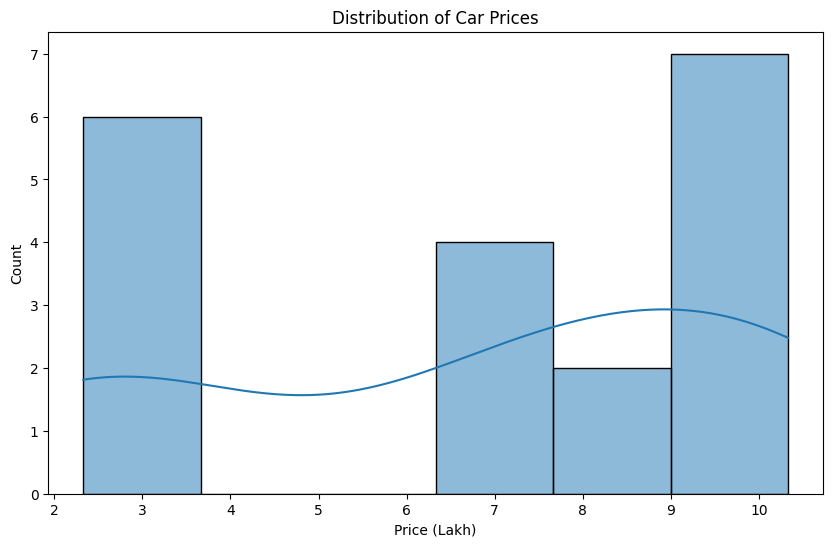

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (Lakh)')
plt.show()

# 3. Year vs Price Analysis

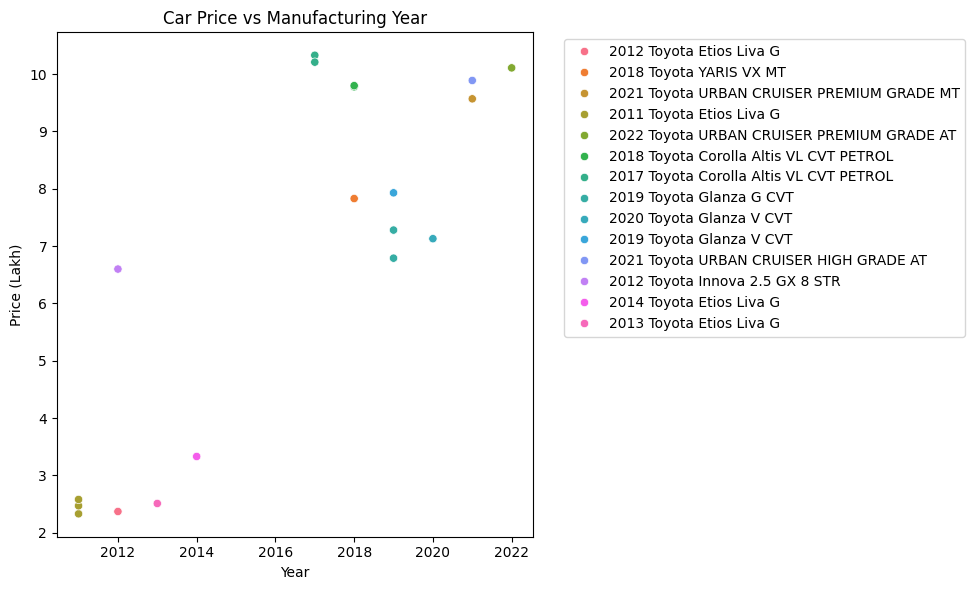

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Price', hue='Name', legend='full')
plt.title('Car Price vs Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Price (Lakh)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Kilometer Driven Analysis

In [69]:
print("\nKilometer Driven Statistics:")
print(df['KilometerDriven'].describe())


Kilometer Driven Statistics:
count       19.000000
mean     49386.578947
std      25015.559115
min      15816.000000
25%      26919.500000
50%      52656.000000
75%      74820.500000
max      89683.000000
Name: KilometerDriven, dtype: float64


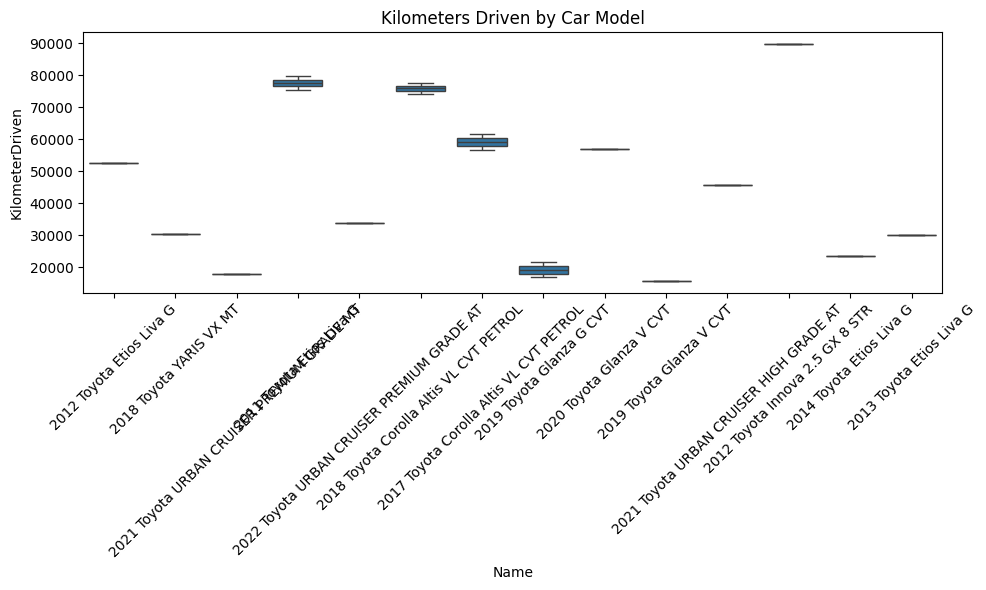

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Name', y='KilometerDriven', data=df)
plt.title('Kilometers Driven by Car Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Transmission Analysis

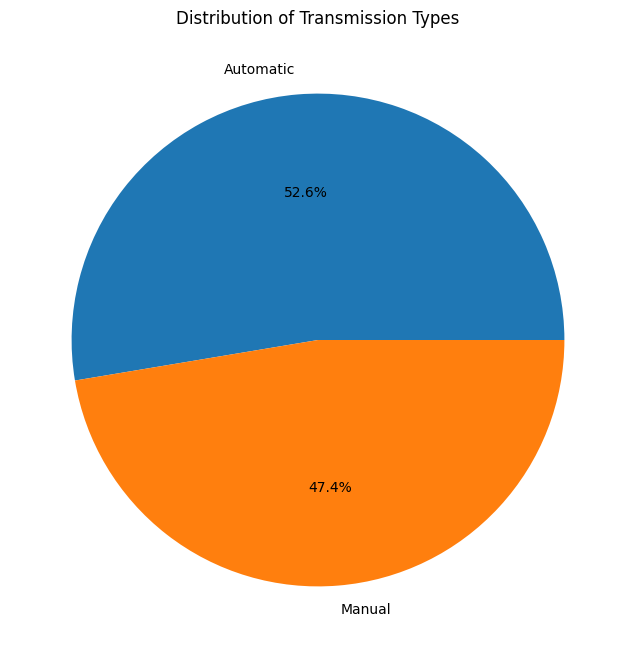

In [71]:
transmission_counts = df['Trransmission'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Transmission Types')
plt.show()

# 6. Fuel Type Analysis

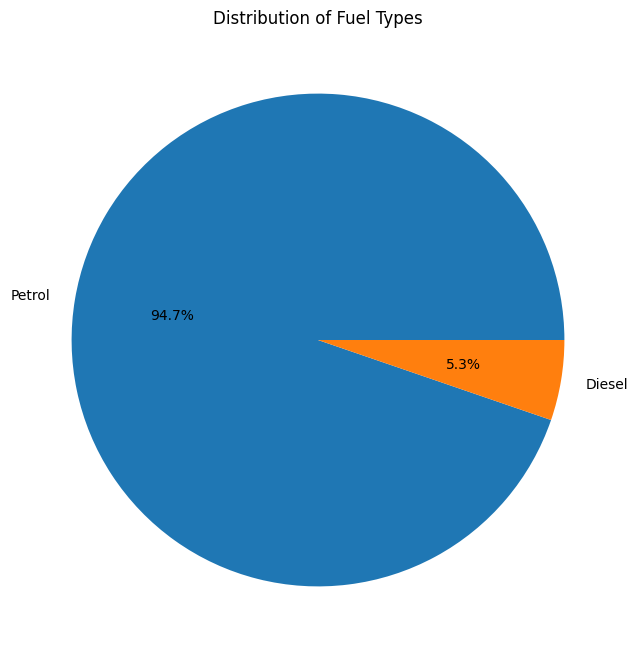

In [72]:
fuel_counts = df['Fuel_Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Fuel Types')
plt.show()


# 7. Feature Analysis

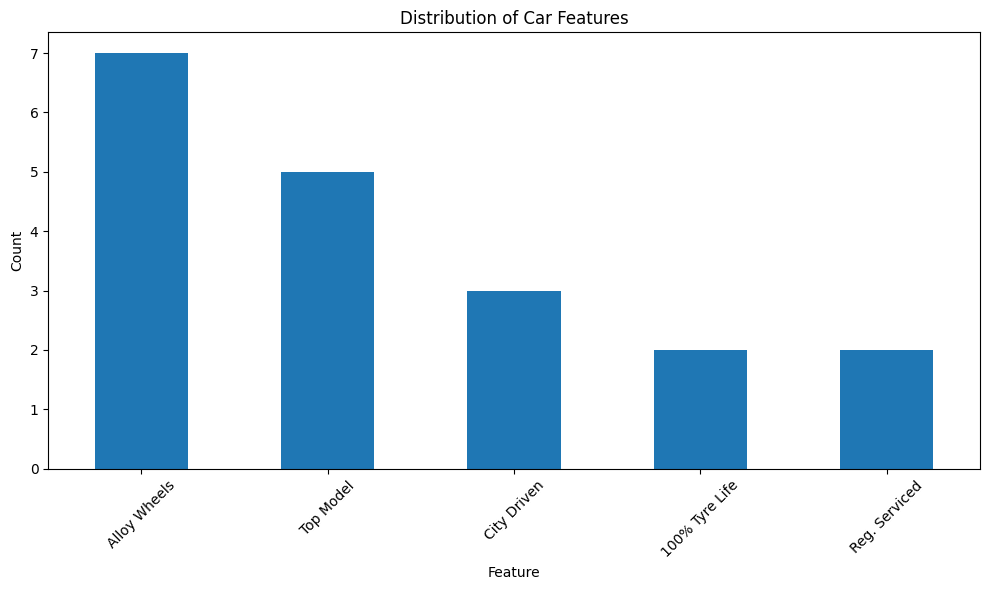

In [73]:
feature_counts = df['Feature'].value_counts()
plt.figure(figsize=(10, 6))
feature_counts.plot(kind='bar')
plt.title('Distribution of Car Features')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. EMI Analysis

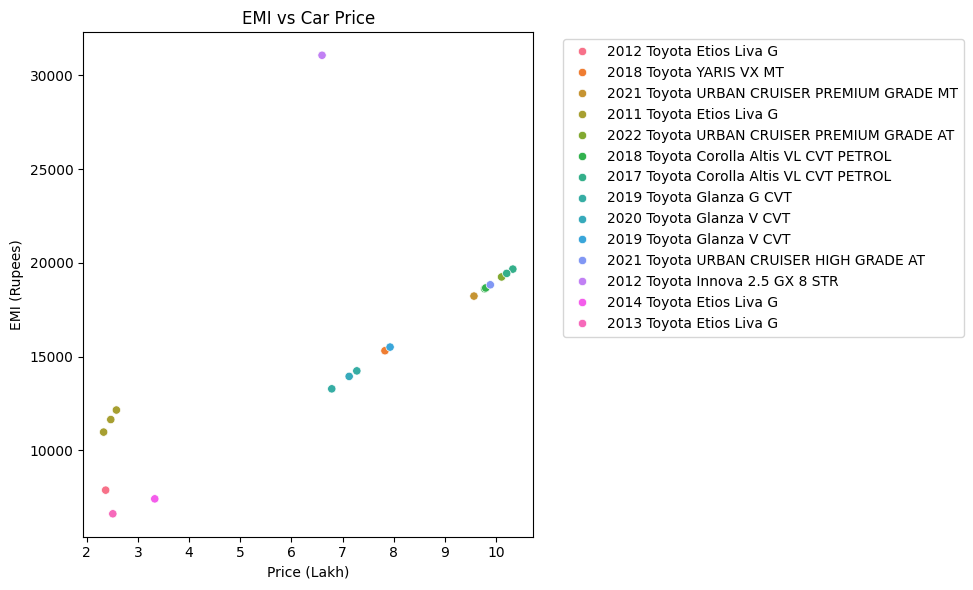

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='EMIs', hue='Name', legend='full')
plt.title('EMI vs Car Price')
plt.xlabel('Price (Lakh)')
plt.ylabel('EMI (Rupees)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 9. Correlation Analysis

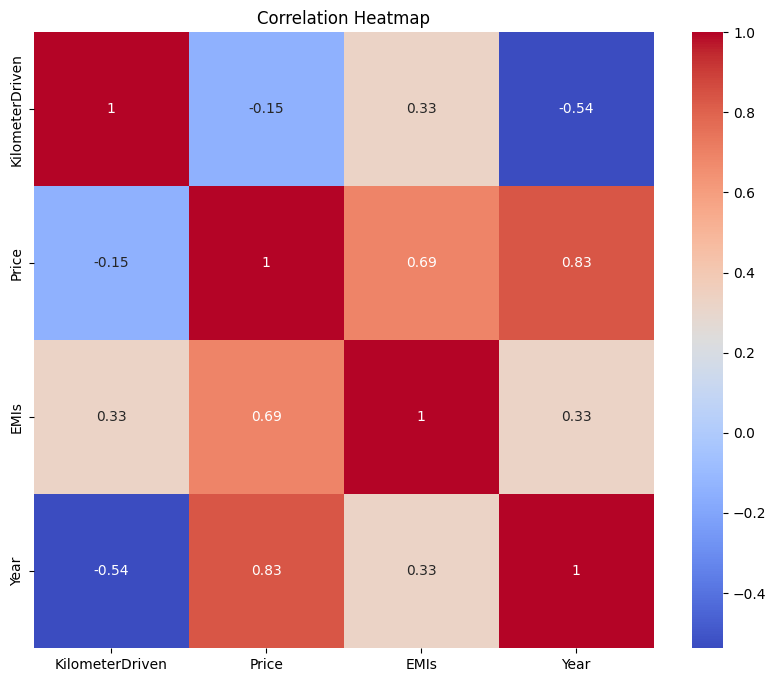

In [75]:
numeric_df = df[['KilometerDriven', 'Price', 'EMIs', 'Year']]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 10. Price per Kilometer Analysis

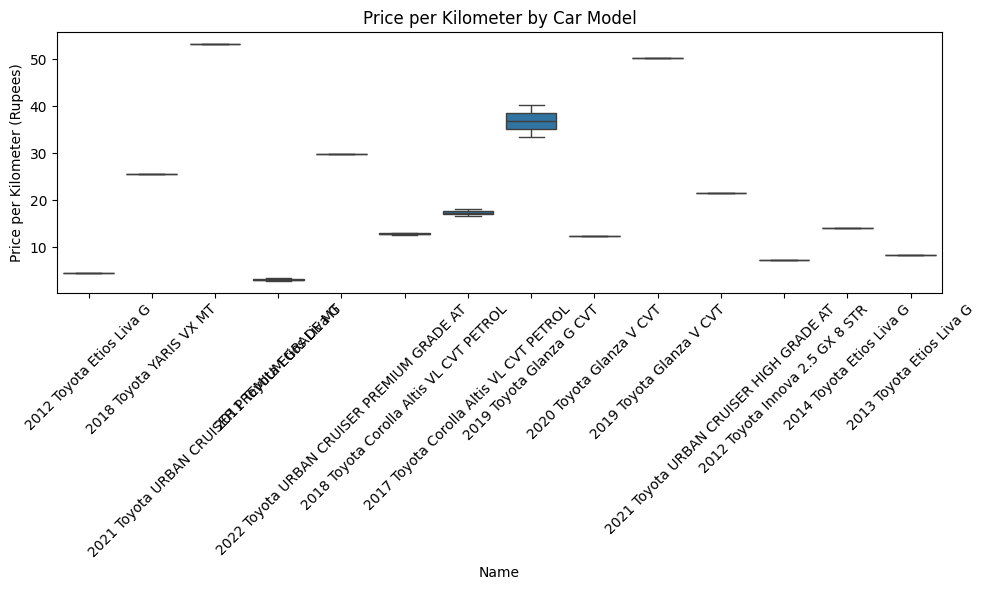

In [76]:
df['Price_per_km'] = df['Price'] * 100000 / df['KilometerDriven']  # Convert Lakh to Rupees
plt.figure(figsize=(10, 6))
sns.boxplot(x='Name', y='Price_per_km', data=df)
plt.title('Price per Kilometer by Car Model')
plt.xticks(rotation=45)
plt.ylabel('Price per Kilometer (Rupees)')
plt.tight_layout()
plt.show()

# 11. Age vs Price Analysis

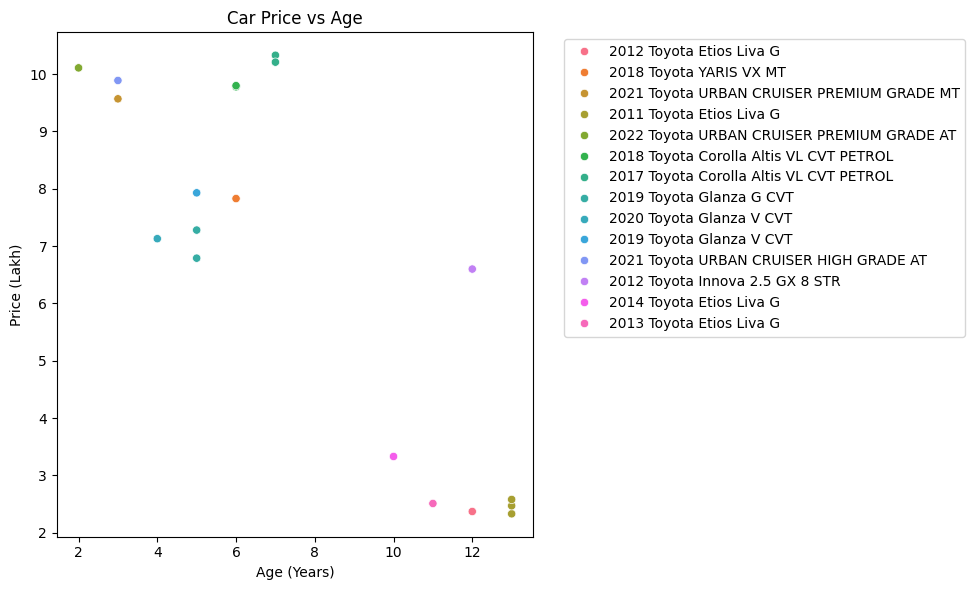

In [77]:
current_year = 2024  # Assuming current year is 2024
df['Age'] = current_year - df['Year']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Price', hue='Name', legend='full')
plt.title('Car Price vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Price (Lakh)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 12. Summary Statistics

In [78]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       KilometerDriven      Price          EMIs         Year  Price_per_km  \
count        19.000000  19.000000     19.000000    19.000000     19.000000   
mean      49386.578947   6.781053  15401.263158  2016.473684     19.530124   
std       25015.559115   3.157574   5703.745016     3.791341     15.491216   
min       15816.000000   2.330000   6610.000000  2011.000000      2.925555   
25%       26919.500000   2.955000  11891.000000  2012.500000      7.841596   
50%       52656.000000   7.280000  15308.000000  2018.000000     14.059531   
75%       74820.500000   9.790000  18741.000000  2019.000000     27.706051   
max       89683.000000  10.330000  31068.000000  2022.000000     53.163713   

             Age  
count  19.000000  
mean    7.526316  
std     3.791341  
min     2.000000  
25%     5.000000  
50%     6.000000  
75%    11.500000  
max    13.000000  


# 13. Top 5 Most Expensive Cars

In [79]:
print("\nTop 5 Most Expensive Cars:")
print(df.nlargest(5, 'Price')[['Name', 'Year', 'Price', 'KilometerDriven']])


Top 5 Most Expensive Cars:
                                          Name  Year  Price  KilometerDriven
7      2017 Toyota Corolla Altis VL CVT PETROL  2017  10.33            56595
11     2017 Toyota Corolla Altis VL CVT PETROL  2017  10.21            61520
4   2022 Toyota URBAN CRUISER PREMIUM GRADE AT  2022  10.11            33986
15     2021 Toyota URBAN CRUISER HIGH GRADE AT  2021   9.89            45799
9      2018 Toyota Corolla Altis VL CVT PETROL  2018   9.80            77581


# 14. Top 5 Least Driven Cars

In [80]:
print("\nTop 5 Least Driven Cars:")
print(df.nsmallest(5, 'KilometerDriven')[['Name', 'Year', 'Price', 'KilometerDriven']])


Top 5 Least Driven Cars:
                                          Name  Year  Price  KilometerDriven
12                    2019 Toyota Glanza V CVT  2019   7.93            15816
8                     2019 Toyota Glanza G CVT  2019   6.79            16870
2   2021 Toyota URBAN CRUISER PREMIUM GRADE MT  2021   9.57            18001
13                    2019 Toyota Glanza G CVT  2019   7.28            21695
17                    2014 Toyota Etios Liva G  2014   3.33            23685
